# TPC7

__identificador__: TPC7;

__título__: Processamento de datasets;

__data início__: 2021-11-28;

__data de finalização__: 2021-12-01;

__supervisor__: José Carlos Ramalho;

__autor__: André Nuno Ribeiro de Sousa

__resumo__: Aplicação que trata uma base de dados, com o intuito de se poder organizar a sua informação tornando assim mais fácil e prática o seu acesso.

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de alunos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
id_aluno,nome,curso,tpc1,tpc2,tpc3,tpc4
"a1","Aysha Melanie Gilberto","LEI",12,8,19,8
"a2","Igor André Cantanhede","ENGFIS",12,16,18,20
"a3","Laurénio Narciso","ENGFIS",8,14,15,14
"a4","Jasnoor Casegas","LCC",14,20,17,11
"a5","Tawseef Rebouças","ENGBIOM",13,14,13,17
"a6","Eryk Clementino","LEI",10,19,11,14
...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

In [2]:
# Descreve em texto o teu modelo
#BDAlunos=[Aluno]
# Aluno = {id: "...", nome: "..."}
# Leitura/carregamento da informação do ficheiro

def lerDataset(fnome):
    bd=[]
    f = open(fnome, encoding='utf-8')
    f.readline() #faz com que o "apontador" leia a 1.ª linha e assim o apontador avança para a 2.ª linha
    
    for linha in f: #ler uma linha de cada vez
        novaLinha = linha.replace("\n", "")
        campos = novaLinha.split(",") #divide a BD em campos
        aluno = {}
        aluno['id'] = campos[0]
        aluno['nome'] = campos[1]
        aluno['curso'] = campos[2]
        listaTPC=[]
        for tpc in campos[3:]:
            listaTPC.append(int(tpc))
        aluno['tpc'] = listaTPC
        bd.append(aluno)
    return bd
    #o dicionário permite ter uma base de dados onde cada linha tem um número de variável de campos

In [24]:
BDalunos = lerDataset("alunos.csv")
print(BDalunos)

In [4]:
import os
print(os.getcwd())

C:\Users\andre\Algoritmos


## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação.
Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [5]:
# Listagem da informação
def listarDataset(bd):
    #print("id      |nome                          |curso            |média ")
    #print("-----------------------------------------------------")
    for a in bd:
        print(a['id']+ " | " + a['nome']+ " | " +a['curso']+ " | " +str(sum(a['tpc'])/len(a['tpc'])))



In [6]:
#listarDataset(BDalunos)

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.

In [7]:
# Consulta de um registo
def consultarDataset(bd, ide):
    
    for a in bd:
        #print("TOU AQUI ",a['id'])
        #print(str(ide))
        if a['id'] == ide:
            print(a['id']+ " | " + a['nome']+ " | " +a['curso']+ " | " +str(sum(a['tpc'])/len(a['tpc'])))


In [8]:
consultarDataset(BDalunos,'"a1"')

"a1" | "Aysha Melanie Gilberto" | "LEI" | 11.75


## Top 10 (exercício 4)

Especifica um função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.

In [9]:
def top10(bd):
    #ordenar e ver top 10
    lista=sorted(bd, key = lambda a: sum(a['tpc'])/len(a['tpc']),reverse=True)
    lista10=[]
    for a in range(0,10):
        lista10.append(lista[a])
    for a in lista10:
        print(a['id']+ " | " + a['nome']+ " | " +a['curso']+ " | " +str(sum(a['tpc'])/len(a['tpc'])))
    #print(lista10)
    # Escreve aqui o teu código

In [10]:
top10(BDalunos)

"a47" | "Moisés João Cornelio" | "LEI" | 18.0
"a80" | "Maria Carolina Josué" | "ENGFIS" | 18.0
"a32" | "Ariane Sofia Foja" | "LEI" | 17.5
"a74" | "Vânia Sofia Porfirio" | "ENGBIOM" | 17.5
"a56" | "Hakeem Brazão" | "LEI" | 17.25
"a84" | "Laudário Frasão" | "LCC" | 17.0
"a13" | "Daniela Patrícia Montes" | "ENGBIOM" | 16.75
"a41" | "Lachezar Rosas" | "ENGBIOM" | 16.75
"a45" | "Imayame Hespanha" | "ENGFIS" | 16.75
"a2" | "Igor André Cantanhede" | "ENGFIS" | 16.5


## Distribuição por curso (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.

In [11]:
def distribPorCurso(bd):
    distribuicao = {}
    for  a in bd:
        if a['curso'] in dict.keys(distribuicao):
            distribuicao[a['curso']] += 1
        else:
            distribuicao[a['curso']] = 1
    return distribuicao
    # Escreve aqui o teu código

In [12]:
Dist = distribPorCurso(BDalunos)
print(Dist)

{'"LEI"': 23, '"ENGFIS"': 32, '"LCC"': 20, '"ENGBIOM"': 25}


## Distribuição por médias (exercício 6)

Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).

In [13]:
def distribPorMedia(bd):
    distribuicao = {}
    for  a in bd:
        if sum(a['tpc'])/len(a['tpc']) in dict.keys(distribuicao):
            distribuicao[sum(a['tpc'])/len(a['tpc'])] += 1
        else:
            distribuicao[sum(a['tpc'])/len(a['tpc'])] = 1
    return distribuicao
    # Escreve aqui o teu código

In [14]:
Diste = distribPorMedia(BDalunos)
print(Diste)

{11.75: 2, 16.5: 4, 12.75: 7, 15.5: 1, 14.25: 6, 13.5: 2, 15.75: 4, 11.5: 3, 13.0: 6, 14.0: 5, 11.0: 1, 14.75: 5, 16.75: 3, 13.25: 5, 15.25: 8, 13.75: 7, 12.25: 2, 16.0: 2, 17.5: 2, 12.5: 2, 15.0: 2, 16.25: 2, 18.0: 2, 12.0: 4, 9.75: 2, 14.5: 5, 17.25: 1, 11.25: 3, 10.75: 1, 17.0: 1}


# Gráficos

## Gráfico da distribuição por curso (exercício 7)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

dict_keys(['"LEI"', '"ENGFIS"', '"LCC"', '"ENGBIOM"'])


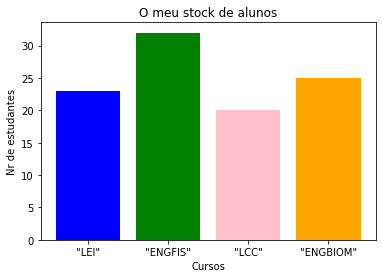

In [18]:
import matplotlib.pyplot as plt
def plotDistribPorCurso(dc):
    left = []
    k=dict.keys(dc)
    v=dict.values(dc)
    tick_label=[]
    height = []
    
    for l in range(0,4):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    print(k)
    for key in k:
        tick_label.append(key)
    
    plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['blue', 'green', 'pink','orange'])
 

    plt.xlabel('Cursos')

    plt.ylabel('Nr de estudantes')

    plt.title('O meu stock de alunos')
 

    plt.show()
plotDistribPorCurso(Dist)

## Gráfico da distribuição por média (exercício 8)

Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

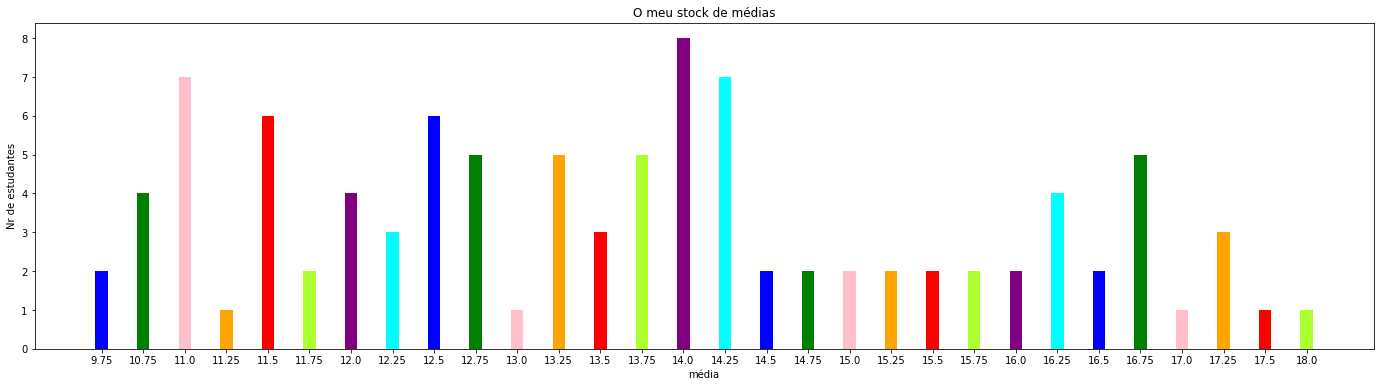

In [23]:
import matplotlib.pyplot as plt
def plotDistribPorMedia(dm):
    left = []
    k=dict.keys(dm)
    v=dict.values(dm)
    tick_label=[]
    height = []
    
    plt.figure(1, figsize=(24, 6))
    
    for l in range(0,len(dm)):
        left.append(l)
    
    for value in v:    
       # print(value)
        height.append(value)
        #print(height)
    k=sorted(k)
    for key in k:
        tick_label.append(key)
    
    plt.bar(left, height, tick_label = tick_label, width = 0.3, color = ['blue', 'green', 'pink','orange','red','greenyellow','purple','cyan'])
 

    plt.xlabel('média')

    plt.ylabel('Nr de estudantes')

    plt.title('O meu stock de médias')
 

    plt.show()
    
plotDistribPorMedia(Diste)